<a href="https://colab.research.google.com/github/paoari/GLOVE-Embeddings/blob/main/Word_embeddings_GLOVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# On the cultural, political and racial biases encoded in NLP algorithms: a qualitative and quasi-quantitative approach.

Author: Ana Paola Arias Martínez 

contact: ariasmartinez.paola.1l@gmail.com

UNAM, Institute of Mathematics

This code allows for the manipulation of embeddings produced by the GLOVE model in order to gain an insight on the multiple biases that are encoded in this algorithm.

## Load GLOVE model

These set of functions allow to access by keys the query words to its respecting vector of the pretrained GLOVE model.

This code section was copied from the GitHub link:  

https://github.com/esfahany/semantic-projection/blob/main/semantic_projection.ipynb

The following functions can be originally found in the previous repository:



*   loadGloveModel
*   glove
*   get_orthogonal_projection
*   get_word_projections
*   get_projection_score
*   get_rankings

This code was elaborated by Kathleen Esfahany as part of the research project ''Python implementation of semantic projection from Grand et al. (2022)''





In [ ]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip

--2023-01-20 17:24:17--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2023-01-20 17:24:17--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2023-01-20 17:24:17--  https://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]


In [ ]:
!unzip glove*.zip

Archive:  glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


In [ ]:
def loadGloveModel(filepath):

    import numpy as np
    f = open(filepath,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    return model

glove_filepath_42B ="glove.42B.300d.txt"

GloVe_Model_42B = loadGloveModel(glove_filepath_42B) # dict w/ words as keys and values as vectors (takes about 3 minutes)


In [ ]:
def glove(input_list):
    """
    Returns 300d GloVe vector corresponding to word(s)
    """
    return [GloVe_Model_42B[word] for word in input_list]

# Vector manipulation functions for single words.

These functions should be implemented to get the corresponding parameters of each of the plot functions for single words.

### Generate end vectors for the semantic space.
Function that takes as input 3 words that define each end of the feature vector. 

In [ ]:
def get_end_vector(a):

  import numpy as np
  
  #The input should be a list of 3 words.

  A = glove(a)

  end_vector = np.mean(np.array(A), axis = 0)

  return end_vector

In [ ]:
small = get_end_vector(["small", "little", "tiny"])


### Generate feature vector

Function that takes as input 2 set of 3 words defining each end point for thefeature vector and
 generates a feature vector based on the multiple possible combinations between the 3 words proposed to represent each end of the semantic space.

In [ ]:
def get_feature_vector(a, b):

  import numpy as np

  #a: list of length n of words on one end of the feature continuum
  #b: list of length m of words on the other end of the continuum
  
  # generate list of GloVe embeddings for each end of continuum
  A = glove(a)
  B = glove(b)

  # generate the n x m possible vector differences ("lines") between the two ends
  lines = [] # will be a (n x m, 300) matrix
  for A_i in A:
      for B_j in B:
          lines.append(B_j - A_i)

  # generate the average of the n x m differences
  feature_vector = np.mean(np.array(lines), axis = 0) # shape (300,)
  return feature_vector      

Example:

In [ ]:
size = get_feature_vector(["small", "little", "tiny"], ["large", "big", "huge"])

### Project words onto feature subspace.

Functions that get the orthogonal projection of a set of words into a desired feature subspace generated from the previously defined ends.

In [ ]:
def get_orthogonal_projection(u, v):

    import numpy as np

    """
    Project vector u on vector v
    """
    projection = (np.dot(u, v)/np.dot(v, v)) * v
    return projection

def get_word_projections(words, feature_set_1, feature_set_2):
    """
    All params are lists of strings 

    example:
    get_word_projection(["mouse", "elephant"],["small", "little", "tiny"], ["large", "big", "huge"])

    """
    # get GloVe embeddings of words
    word_embeddings = glove(words)

    # get feature subspace
    feature_vector = get_feature_vector(feature_set_1, feature_set_2)

    word_projections = [get_orthogonal_projection(word, feature_vector) for word in word_embeddings]

    return word_projections

In [ ]:
mouse_elephant = get_word_projections(["mouse", "elephant"],["small", "little", "tiny"], ["large", "big", "huge"])
print(mouse_elephant)

### Rank words along feature vector

Functions that rank the value of the orthogonal projections of the query list to a feature vector.

In [ ]:
def get_projection_score(u, v):

    import numpy as np 
    
    """
    Get a scalar magnitude of u on v
    """
    projection_score = (np.dot(u, v)/np.dot(v, v))
    return projection_score

def get_scores(words, feature_set_1, feature_set_2):
    """
    
    get_scores(["mouse", "elephant"],["small", "little", "tiny"], ["large", "big", "huge"])

    """
    # get GloVe embeddings of words
    word_embeddings = glove(words)

    # get feature subspace
    feature_vector = get_feature_vector(feature_set_1, feature_set_2)

    # get projection scores
    projection_scores = [get_projection_score(word, feature_vector) for word in word_embeddings]

    return projection_scores

In [ ]:
get_scores(["mouse", "elephant"],["small", "little", "tiny"], ["large", "big", "huge"])


[-0.2960019121780912, 0.04849688200908988]

###PCA 
Function that applies PCA onto a list of words. This function can be implemented also for a list of composed words produced in the following section.

In [ ]:
def performPCA(words, n):

  import numpy as np

  #words must be in the form :
  #words = glove(["small","big","large"])

  # or
  # animals = ["mouse", "hamster", "ant", "dog", "rhino", "elephant", "whale"]
  # PCA_animals = glove(animals)

  # n is for number of dimensions


  from sklearn.decomposition import PCA

  arrays = np.empty((0, 300), dtype='f')
  arrays = np.append(arrays, words, axis=0)

  wordsPCA =  PCA(n_components=n).fit_transform(arrays)
  
  return wordsPCA


Example for single words.

In [ ]:
words_PCA = glove(["small","big","large"])
palabras = performPCA(words_PCA,2)
palabras

array([[-1.94732501, -1.85705249],
       [ 3.52798717, -0.13328615],
       [-1.58066215,  1.99033864]])

Example for composed words:

In [ ]:
performPCA(types_of_dogs, 2)

array([[-2.87012255e+00,  6.80741131e-16],
       [ 2.87012255e+00,  6.80741131e-16]])

# Vector manipulation functions for composed words.
The following set of functions allow the manipulation of composed words for their following implementation into plotting functions.


### Vector addition and vector addition list.

The following function sums a list of words to a corresponding pivot in the case of manipulation of composed words.

In [ ]:
def VectorAddition(a, b):
  import numpy as np
  c = np.add(a,b)

  return c

def VectorAdditionList(pivot, complement_words):
  pivot = glove(pivot)
  complement_list = glove(complement_words)
  comp_words = []

  for word in complement_list:
    comp_words.append(VectorAddition(pivot, word).ravel())
  return comp_words

Example:

In [ ]:
types_of_dogs = VectorAdditionList(["dog"],["small", "big"])


### Ranking compound words onto feature subspace

Just as in the previous section, the following functions are used to get the projection scores of a set of compound-word into a feature subspace.

In [ ]:
def GetProjectionScoreSum(u, v):

  import numpy as np
  projection_score_sum = (np.dot(u, v)/np.dot(v, v))
  return projection_score_sum

def GetScoreSum(words, feature_set_1, feature_set_2):

  #GetScoreSum(["woman+old", "woman+young"],["small", "little", "tiny"], ["large", "big", "huge"])

  # get feature subspace
  feature_vector_sum = get_feature_vector(feature_set_1, feature_set_2)

  # get projection scores
  projection_scores_sum = []
  projection_scores_sum = [GetProjectionScoreSum(word, feature_vector_sum) for word in words]

  return projection_scores_sum



For this exmaple the query list of words were previously rpoduced with the VectorAdditionList function.

In [ ]:
scores = GetScoreSum(types_of_dogs, ["small", "little", "tiny"], ["large", "big", "huge"])
scores

[-0.3476646489578169, 0.4565722315818102]

### Get dataframe for list of word additions

The following function creates a dataframe of the respection scorres for a list of query words onto a feature subspace.

In [ ]:
def DataFrame(word_labels, words, pivot, Aend, Bend):

  import pandas as pd

  compound_words = VectorAdditionList(pivot, words)
  scores = GetScoreSum(compound_words, Aend, Bend)
  labels = word_labels

  dataframe = pd.DataFrame({'word':labels, 'vector':compound_words, 'scores': scores})

  dataframe.sort_values("scores", ascending = False)
  return dataframe


Example:

In [ ]:
b = ["refined", "important", "pretty"]
a = ["irrelevant", "ugly", "gross"]
labels = ["american", "rich", "wealthy", "straight", "poor", "latino", "migrant", "homosexual" ]
words = ["american", "rich", "wealthy", "straight", "poor", "latino", "migrant", "homosexual" ]
pivot = ['woman']
pivot_2 = ["man"]
pivot_3 = ['person']

woman_dataframe = DataFrame(labels, words, pivot, a, b)
men_dataframe = DataFrame(labels, words, pivot_2, a, b )
person_dataframe = DataFrame(labels, words, pivot_3, a, b )

woman_dataframe.sort_values("scores", ascending = False)

# Scale images

The following set of functions are implemented for the elaboration of plots coorresponding to the orthogonal progection of a seet of query words onto a feature subspace.

### Scale plot for Hot-cold scale (single words).

Example that produces the orthogonal projections onto a hot-cold scale.

In [ ]:
def ScalePlot(a, b, aname, bname, words, length):

  import numpy as np
  import matplotlib.pyplot as plt
  import itertools
  colors = itertools.cycle(["c", "m", "gold", "orange", "lightgreen", "mediumpurple", "coral", "rosybrown", "firebrick"])

  #generate vectors:

  anew = get_end_vector(a)
  bnew = get_end_vector(b)

  #Apply PCA to words to be evaluated
  PCA_words = glove(words)

  # Append both ends of the scale to our list
  PCA_words.append(anew)
  PCA_words.append(bnew)

  #Perform PCA on list
  words_2D = performPCA(PCA_words, 2)

  # define x's and y's for scale ends:
  # x1,y1 represent a end
  # x2, y2 represent b end

  x1, y1= words_2D[-1]
  x2, y2= words_2D[-2] 

  # Define the slope of the feature subspace
  x = np.array([x2-x1, y2-y1])

  # Elongate feature subspace line
  plt.figure(figsize=(10,10))
  mag = np.sqrt((x2-x1)**2 + (y2-y1)**2)
  x2_dir, y2_dir = (x2-x1)/mag, (y2-y1)/mag
  x1, x2 = x1 - length*x2_dir, x2 + length*x2_dir
  y1, y2 = y1 - length*y2_dir, y2 + length*y2_dir

  for i,v in enumerate(words_2D):
      # Compute the projection of v onto x
      proj_vx = np.dot(v, x) / np.dot(x, x) * x
      #plt.plot([0, proj_vx[0]], [0, proj_vx[1]], color='black')
      L = 20
      x_start, y_start = proj_vx[0] - L * x2_dir, proj_vx[1] - L * y2_dir
      x_end, y_end = proj_vx[0] + L * x2_dir, proj_vx[1] + L * y2_dir
      plt.plot([x_start, x_end], [y_start, y_end], color='black')

      # Plot the vectors
      plt.scatter(v[0], v[1], marker='o', color=next(colors))
      plt.annotate(words[i], (v[0], v[1]), textcoords="offset points", xytext=(20,10), ha='center', va = "top")

      # Plot the line that joins v and its projection
      plt.plot([v[0], proj_vx[0]], [v[1], proj_vx[1]], '--', color='black')

      if i == len(words) -1:
        break

  plt.legend()
  plt.xlim(-10, 10)
  plt.ylim(-10, 10)
  plt.xticks([-10, 10])

  plt.legend()
  plt.xlim(-7, 7)
  plt.ylim(-7,7)
  plt.xticks([-7, 7])

  font_dict = {'fontsize': 15, 'verticalalignment':'top'}

  # Set the x-tick labels for the endpoints
  plt.gca().set_xticklabels([aname, bname], fontdict=font_dict)
  # Set the x-axis label font size
  plt.gca().xaxis.label.set_size(50)

  plt.savefig(aname)
  plt.show()


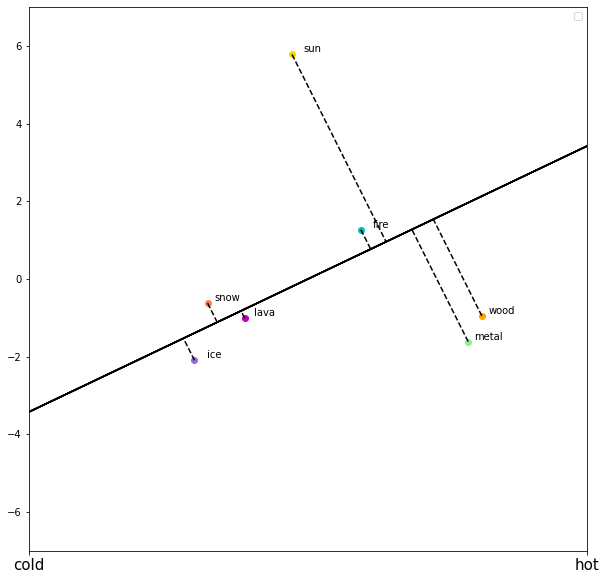

In [ ]:
# Add the list of words defining each end vector.
cold = ["cold", "frozen", "icy"]
hot = ["hot", "boiling", "burning"]

# Generate list of words to be evaluated
words = ["fire", "lava", "sun", "wood", "metal", "ice", "snow"]

#Define length of the feature subspace
length = 10

aname = 'cold'
bname = 'hot'

# Call the function
ScalePlot(cold, hot, aname, bname, words, length)


### Scale Plot for Justice-Injustice scale (composed words).
Function that plots the orthogonal projections of a set of composed words onto a feature subspace.


This is an example using the function ScalePlotComposedWords to Plot the scale of composed words associated with justice and injustice terms and their relation with women.

In [ ]:
def ScalePlotComposedWords(a, b, aname, bname, words, pivot, length):

  import matplotlib.pyplot as plt
  import numpy as np
  import itertools
  from sympy.abc import z
  from sympy import lambdify

  # Generate vector for each of the ends of the feature vector
  plot_title = aname
  a = get_end_vector(a)
  b = get_end_vector(b)

  # Create composed words vector
  composed_words = VectorAdditionList(pivot, words)

  #Append both ends of the scale to our list
  composed_words.append(a)
  composed_words.append(b)

  # Perform PCA on list
  words_2D = performPCA(composed_words,2)

  # Define x's and y's for the slope
  x1, y1= words_2D[-1]
  x2, y2= words_2D[-2]

  # Define the slope for the feature subspace
  x =  np.array([x2-x1, y2-y1])

  # Define colors for the scatter plot
  colors = itertools.cycle(["c", "m", "gold", "orange", "lightgreen", "mediumpurple", "coral", "rosybrown", "firebrick"])

  # Plot figure
  plt.figure(figsize=(10,10))

  # Extend the feature subspace
  mag = np.sqrt((x2-x1)**2 + (y2-y1)**2)
  x2_dir, y2_dir = (x2-x1)/mag, (y2-y1)/mag
  x1, x2 = x1 - length*x2_dir, x2 + length*x2_dir
  y1, y2 = y1 - length*y2_dir, y2 + length*y2_dir


  for i,v in enumerate(words_2D):
      # Compute the projection of v onto x
      proj_vx = np.dot(v, x) / np.dot(x, x) * x
      L = 20
      x_start, y_start = proj_vx[0] - L * x2_dir, proj_vx[1] - L * y2_dir
      x_end, y_end = proj_vx[0] + L * x2_dir, proj_vx[1] + L * y2_dir
      plt.plot([x_start, x_end], [y_start, y_end], color='black')

      # Plot the vectors
      plt.scatter(v[0], v[1], marker='o', color=next(colors))
      plt.annotate(words[i], (v[0], v[1]), textcoords="offset points", xytext=(20,10), ha='center', va = "top")

      # Plot the line that joins v and its projection
      plt.plot([v[0], proj_vx[0]], [v[1], proj_vx[1]], '--', color='black')

      if i == len(words) - 1:
        break

  plt.legend()
  plt.xlim(-7, 7)
  plt.ylim(-7,7)
  plt.xticks([-7, 7])

  font_dict = {'fontsize': 15, 'verticalalignment':'top'}
  # Set the x-tick labels for the endpoints
  plt.gca().set_xticklabels([aname, bname], fontdict=font_dict)
  
  # Set the x-axis label font size
  plt.gca().xaxis.label.set_size(50)

  plt.savefig(aname)
  plt.show()


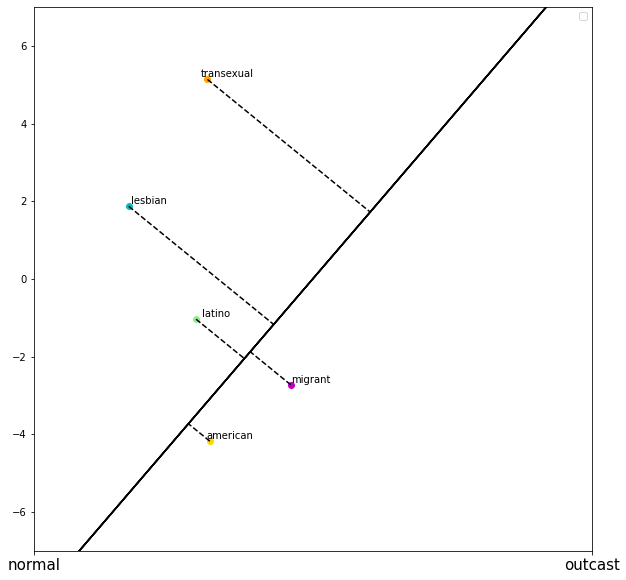

In [ ]:
# Generate vector for each of the ends of the feature vector
outcast = ["outcast", "illegal", "opressed"] # a
normal = ["normal", "standard", "legal"] # b

# Seet names for each name of the scale
bname = 'outcast'
aname = 'normal'

# List of words to be evaluated
words = ["lesbian", "migrant", "american", "transexual", "latino"]

# Set pivot for vector addition
pivot = ["woman"]

# Set length for the scale
length = 10

ScalePlotComposedWords(outcast, normal, aname, bname, words, pivot, length)

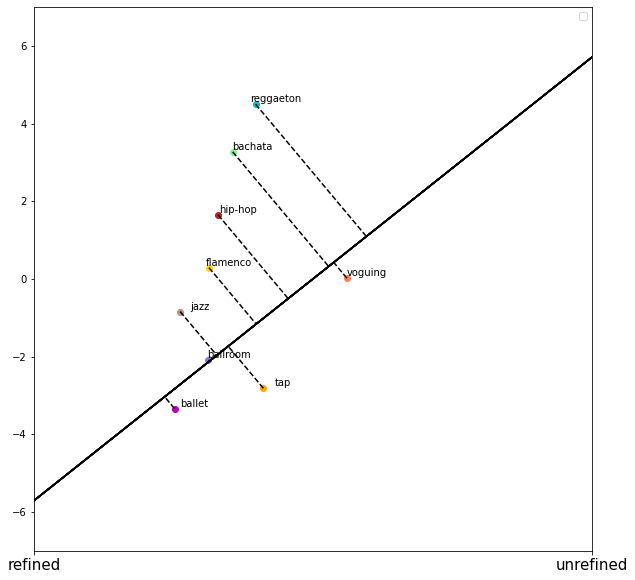

In [ ]:
# Generate vector for each of the ends of the feature vector
refined = ["refined", "classy", "civilized"] # a
unrefined = ["unrefined", "primitive", "uncivilized"] # b

# Seet names for each name of the scale
aname = 'refined'
bname = 'unrefined'

# List of words to be evaluated
words = ["reggaeton", "ballet", "flamenco", "tap", "bachata", "ballroom", "voguing", "jazz", "hip-hop"]

# Set pivot for vector addition
pivot = ["dance"]

# Set length for the scale
length = 10

ScalePlotComposedWords(refined, unrefined, aname, bname, words, pivot, length)

# Lollipops

### Projection scores for compound words

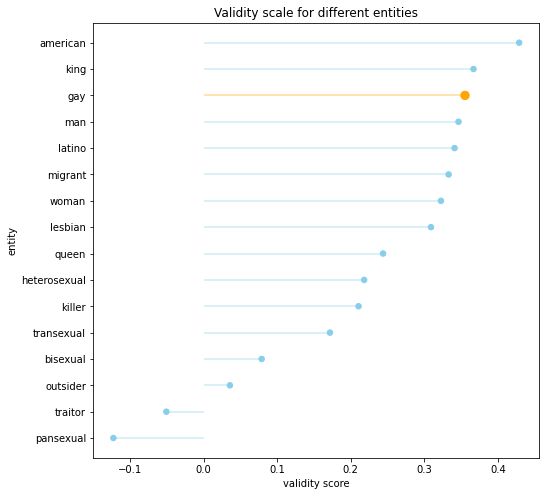

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Data frame must contain word and its respective value in the scale.
# First we need to define the scale vector. For that we are going to use the Generate_feature_vector() function.

# Now we need a function that projects words onto feature subspace. 

words = ["gay", "migrant", "woman", "man", "american", "transexual", "latino", "king", "queen", "traitor", "killer", "outsider", "heterosexual", "lesbian", "bisexual", "pansexual"]
b =  ["good", "valid", "legal"]
a = ["bad", "odd", "opression"] 

word_rankings = get_scores(words, a , b)

words_and_projections = zip(words,word_rankings)

# Create a pandas data frame
df = pd.DataFrame(words_and_projections, columns = ["word", "score"])

# Sort data frame from lowest to highest
ordered_df = df.sort_values(by='score')
my_range=range(1,len(df.index)+1)

# For vertical plot
'''
# For vertical plot
plt.stem(ordered_df['score'])
plt.xticks( my_range, ordered_df['word'])
plt.show()
'''
# For horizontal plot:

# The horizontal plot is made using the hline function

my_color=np.where(ordered_df['word']=='gay' , 'orange', 'skyblue')
my_size=np.where(ordered_df['word']=='gay', 70, 30)

plt.figure(figsize=(8,8))
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['score'], color=my_color, alpha=0.4)
plt.scatter(ordered_df['score'], my_range, color=my_color, s=my_size, alpha=1)
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['word'])
plt.title("Validity scale for different entities", loc='center')
plt.xlabel('validity score')
plt.ylabel('entity')

# Show the plot
plt.savefig('justice_injustice_lollipops')
plt.show()



In [ ]:
a = ["small", "little", "tiny"]
b =  ["big", "huge", "large"]
word_labels = ["small dog", "big dog"]
#LollipopsWordSum(types_of_dogs, word_labels, a, b, "types of dogs", "size score")

# Vector addition lollipops

The following function allows for the creation of lollipops for the orthogonal projection values of a set of composed words onto a specified feature subspace.


In [ ]:
def LollipopsWordSum(words, a, b, pivot, aname, bname, title, title_png):
  
  import pandas as pd
  import matplotlib.pyplot as plt
  import numpy as np

  # Compute vector addition list.
  composedwords = VectorAdditionList(pivot,words)

  # Prepare data for dataframe
  word_rankings = GetScoreSum(composedwords, a , b)
  words_and_projections = zip(words, word_rankings)
    
  # Create a pandas data frame
  df = pd.DataFrame(words_and_projections, columns = ["word", "score"])

  # Sort data frame from lowest to highest
  ordered_df = df.sort_values(by='score')
  my_range=range(1,len(df.index)+1)

  # For horizontal plot:
  # The horizontal plot is made using the hline function

  plt.figure(figsize=(8,8))
  #plt.hlines(y=my_range, xmin=0, xmax=ordered_df['score'], color=my_color, alpha=0.4)
  plt.hlines(y=my_range, xmin=ordered_df['score'].min(), xmax=ordered_df['score'], color='skyblue', alpha=0.4)
  plt.scatter(ordered_df['score'], my_range, color='skyblue', alpha=1)
  
  # Add titles and axis names
  plt.yticks(my_range, ordered_df['word'])
  plt.title(title, loc='center')
  plt.ylabel('entity')

  # Set the x-tick labels for the endpoints
  font_dict = {'fontsize': 15, 'verticalalignment':'top'}
  plt.xticks([ordered_df['score'].min(), ordered_df['score'].max()], [aname, bname])

  # Show the plot
  plt.savefig(title)
  plt.savefig(
    title_png,
    format='png',
)
  plt.show()


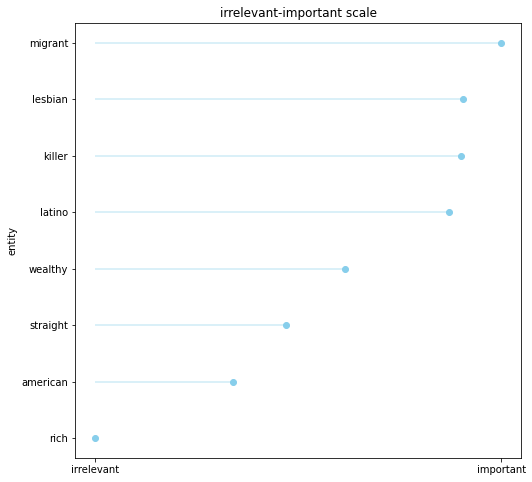

In [ ]:
# 1. Compute vector addition list.
words =["american", "rich", "wealthy", "straight", "killer", "latino", "migrant", "lesbian", ]
pivot = ["woman"]

# 2. define a side of the scale.
b = ["refined", "important", "pretty"]
a = ["irrelevant", "ugly", "gross"]

bname = "important"
aname = "irrelevant"

title = "irrelevant-important scale" 
title_png = "irrelevant-important scale"

#LollipopsWordSumComparison(women, men, labels, a, b, "men'women", "score", "men-women.png")
LollipopsWordSum(words, b, a, pivot, aname, bname, title, title_png)

##Lollipop for women


In [ ]:
def LollipopsWordSumComparison(wordset1, wordset2, word_label, a, b, aname, bname, title, x_axis, title_png):
  
  # For word set 1:
  word_rankings1 = GetScoreSum(wordset1, a , b)
  words_and_projections1 = zip(word_label,word_rankings1)

  # For wordset 2:
  word_rankings2 = GetScoreSum(wordset2, a , b)
  words_and_projections2 = zip(word_label,word_rankings2)  
  word_rankings_1_2 = zip(word_label, word_rankings1, word_rankings2)

  # Create a pandas data frame
  df3 = pd.DataFrame(word_rankings_1_2, columns = ["word", "score1", "score2"])

  # Sort data frame from lowest to highest
  my_range=range(1,len(df3.index)+1)
  ordered_df3 = df3.sort_values(by = 'score2' )

  # The horizontal plot is made using the hline function
  plt.hlines(y=my_range, xmin=ordered_df3['score2'], xmax=ordered_df3['score1'], color='grey', alpha=0.4)
  plt.scatter(ordered_df3['score1'], my_range, color='skyblue', alpha=1, label='score1 (woman)')
  plt.scatter(ordered_df3['score2'], my_range, color='green', alpha=0.4 , label='score2 (man)')
  plt.legend()

  # Add titles and axis names
  plt.yticks(my_range, ordered_df3['word'])
  plt.title("Comparison of the value 1 and the value 2", loc='left')
  plt.xlabel('Value of the variables')
  plt.ylabel('Group')

  # Set the x-tick labels for the endpoints
  font_dict = {'fontsize': 15, 'verticalalignment':'top'}
  plt.gca().set_xticklabels([aname, bname], fontdict=font_dict)
  
  # Set the x-axis label font size
  plt.gca().xaxis.label.set_size(50)

  # Show and save the plot
  plt.savefig(
  title_png,
  format='png',
)

  plt.show()

# Radar chart

In [ ]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r= woman_dataframe['scores'], 
      theta=woman_dataframe['word'],
      fill='toself',
      #fillcolor = 'crimson',
      #opacity = 0.5,
      #line=dict(color="crimson"),
      name='women'
))

fig.add_trace(go.Scatterpolar(
      r= men_dataframe['scores'], 
      theta= men_dataframe['word'],
      fill='toself',
      #fillcolor = 'orange',
      #opacity = 0.5,
      #line=dict(color="orange"),
      name= 'men'
))

fig.add_trace(go.Scatterpolar(
      r= person_dataframe['scores'], 
      theta= person_dataframe['word'],
      fill='toself',
      #fillcolor = 'orange',
      #opacity = 0.5,
      #line=dict(color="orange"),
      name= 'person'
))

fig.update_layout(
  title = {'text': 'Irrelevant - Important plot : women vs men for different modifiers', 'x':0.5, 'xanchor':'center', 'yanchor': 'top'},
  polar=dict(
    radialaxis=dict(
      visible=True,
      #range=[0, men_dataframe['scores'].max()]
    )),
  showlegend=True
)

fig.write_image("woman_man_person_radarchart.png")
fig.show()

NameError: ignored

### Perform PCA


In [ ]:
def performPCA(words, n):
  # words must be an array of vectors produced with the function GloVe_Model_42B[word]
  from sklearn.decomposition import PCA

  arrays = np.empty((0, 300), dtype='f')
  arrays = np.append(arrays, words, axis=0)

  wordsPCA =  PCA(n_components=n).fit_transform(arrays)
  
  return wordsPCA


In [ ]:
words_PCA = [GloVe_Model_42B["small"],GloVe_Model_42B["tiny"],GloVe_Model_42B["little"], GloVe_Model_42B["huge"], GloVe_Model_42B["big"], GloVe_Model_42B["enormous"]]
palabras = performPCA(words_PCA,2)
palabras

array([[-2.03259605, -0.81128267],
       [-2.47381974, -1.7641459 ],
       [-2.77879315,  1.58303214],
       [ 2.79361086,  0.06028084],
       [ 1.43749024,  2.86366594],
       [ 3.05410784, -1.93155036]])

In [ ]:
#from sklearn.decomposition import PCA


#arrays = np.empty((0, 300), dtype='f')

    # adds the vector of the query word
#arrays = np.append(arrays, [GloVe_Model_42B["mouse"],GloVe_Model_42B["elephant"],GloVe_Model_42B["whale"], GloVe_Model_42B["dog"], GloVe_Model_42B["tiny"], size], axis=0)

#principalComponents =  PCA(n_components=2).fit_transform(arrays)
#principalComponents


### Graph vectors

In [ ]:
def graphVectors(wordsPCA, names):
  # wordsPCA is the output of performPCA function
  # names is an array with the names for the word vectors in the same order as wordsPCA's output.

  import numpy as np
  import matplotlib.pyplot as plt
    
  # The data are given as list of lists (2d list)

  # Taking transpose
  x, y = wordsPCA.T
      
  # plot our list in X,Y coordinates
  plt.scatter(x, y)
  for i, label in enumerate(names):
      plt.annotate(label, (x[i], y[i]))
      
  plt.show()

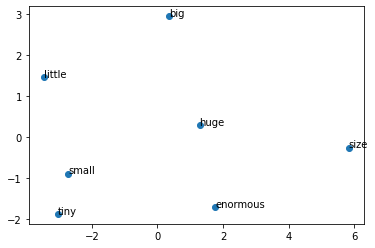

In [ ]:

graphVectors(palabras, ["small", "tiny", "little", "huge", "big", "enormous", "size"] )

# Heatmaps

In [ ]:
def Heatmaps(pivot, words, a, b, title_png, title,scale):
  
  import numpy as np
  import pandas as pd
  import seaborn as sns

  pivoted_words = VectorAdditionList(pivot, words)
  pivoted_words_2 = []

  for i in range(len(pivoted_words)):
    for j in range(len(pivoted_words)):
      pivoted_words_2.append(VectorAddition(pivoted_words[i], pivoted_words[j]))

  scores = GetScoreSum(pivoted_words_2, a, b)
  scores_new = np.reshape(scores, (len(words), len(words)))
  dataframe = pd.DataFrame(scores_new, columns = words, index = words)
  dataframe

  heatmap = sns.heatmap(dataframe, cbar_kws={'label': scale})
  fig = heatmap.get_figure()
  fig.suptitle(title)
  fig.savefig(title_png) 

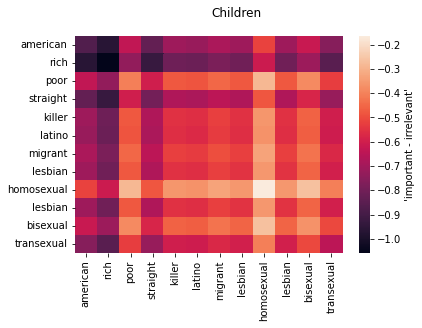

In [ ]:
# Woman, man, child.

pivot = ["child"]
words = ["american", "rich", "poor", "straight", "killer", "latino", "migrant", "lesbian", "homosexual", "lesbian", "bisexual", "transexual"]
a = ["refined", "important", "pretty"]
b = ["irrelevant", "ugly", "gross"]
title_png = "child_heatmap.png"
title = "Children"
scale = "'important - irrelevant'"

Heatmaps(pivot, words, a, b, title_png, title, scale)



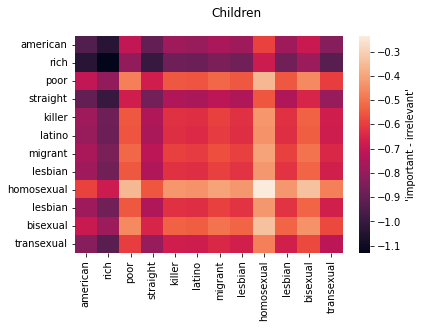

In [ ]:

pivot = ["cat"]
words = ["american", "rich", "poor", "straight", "killer", "latino", "migrant", "lesbian", "homosexual", "lesbian", "bisexual", "transexual"]
a = ["refined", "important", "pretty"]
b = ["irrelevant", "ugly", "gross"]
title_png = "child_heatmap.png"
title = "Children"
scale = "'important - irrelevant'"

Heatmaps(pivot, words, a, b, title_png, title, scale)


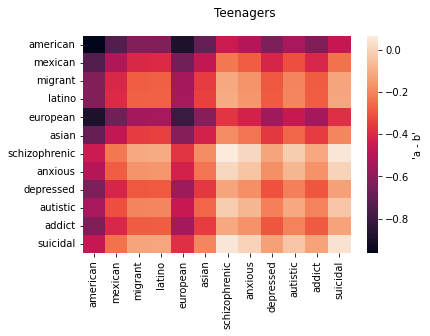

In [ ]:
# Mental health - race

pivot = ["teenager"]
words = ["american", "mexican", "migrant", "latino", "european", "asian", "schizophrenic", "anxious", "depressed", "autistic", "addict", "suicidal"]
a = ["normal", "common", "standard"]
b = ["unusual", "abnormal", "extraordinary"]
title_png = "teen_heatmap.png"
title = "Teenagers"
scale = "'a - b'"

Heatmaps(pivot, words, a, b, title_png, title, scale)



Heatmap for different entities + teenager. Positive values (light cells) approach ["unusual", "abnormal", "extraordinary"] side of the scale, while negatives values (dark cells) approach ["normal", "common", "standard"] side of the scale.

In [ ]:

def NewHeatmap(pivot, words_1, words_2, a, b,  title_png, title, scale):

  import numpy as np
  import pandas as pd
  import seaborn as sns

  pivoted_words_1 = VectorAdditionList(pivot, words_1)
  pivoted_words_2 = VectorAdditionList(pivot, words_2)

  pivoted_words_3 = []

  for i in range(len(pivoted_words_1)):
    for j in range(len(pivoted_words_1)):

      pivoted_words_3.append(VectorAddition(pivoted_words_1[i], pivoted_words_2[j]))

  scores = GetScoreSum(pivoted_words_3, a, b)
  scores_new = np.reshape(scores, (len(words_1), len(words_1)))
  dataframe = pd.DataFrame(scores_new, columns = words_2, index = words_1)
  dataframe.sort_values(by = [words_2[0]], inplace = True)
  dataframe.sort_values(by = [words_1[0]], inplace = True,  axis = 1)

  heatmap = sns.heatmap(dataframe, cbar_kws={'label': scale})
  fig = heatmap.get_figure()
  fig.suptitle(title)
  fig.savefig(title_png, bbox_inches='tight')


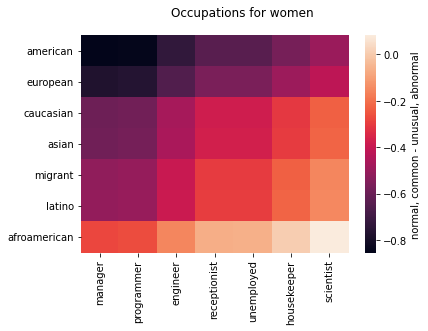

In [ ]:
pivot = ["woman"]
words_1 = ["american", "migrant", "latino", "european", "asian", "afroamerican", "caucasian"]
words_2 = ["programmer", "scientist", "housekeeper", "unemployed", "manager", "engineer", "receptionist"]
a = ["normal", "common", "standard"]
b = ["unusual", "abnormal", "extraordinary"]
title_png = "Occupation_women_heatmap.png"
title = "Occupations for women"
scale = "normal, common - unusual, abnormal"

NewHeatmap(pivot, words_1, words_2, a, b,  title_png, title, scale)